 ## IMPORTING ALL THE REQUIRED PACKAGES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import warnings
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import xgboost as xgb
import joblib


## LOADING DATA 

In [48]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
df.shape

(1470, 35)

## BASIC PREPROCESSING

In [50]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [52]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [53]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [54]:
# EmployeeCount , Over18 these row are not important so we will drop it
df = df.drop(columns=['EmployeeCount' , 'Over18'] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [55]:
df['Attrition'] = df['Attrition'].map({"Yes":1,"No":0})

In [56]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

## SPLITTING DATA IN TRAIN AND TEST

In [57]:
## splitting the data in train and test 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [58]:
X_train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [59]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

## CREATING A PIPELINE

In [60]:
Categorical_columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [61]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),Categorical_columns),
],remainder='passthrough')

In [62]:
X_train_final = transformer.fit_transform(X_train)

In [63]:
X_test_final = transformer.transform(X_test)
print(X_test_final[0])

[0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 3.4000e+01 1.4800e+03 4.0000e+00
 3.0000e+00 1.8820e+03 3.0000e+00 6.4000e+01 3.0000e+00 3.0000e+00
 4.0000e+00 9.7130e+03 2.4444e+04 2.0000e+00 1.3000e+01 3.0000e+00
 4.0000e+00 8.0000e+01 3.0000e+00 9.0000e+00 3.0000e+00 3.0000e+00
 5.0000e+00 3.0000e+00 1.0000e+00 0.0000e+00]


In [64]:
#scalling the data 
scaler = StandardScaler()

scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

## TRAINING DATA ON DIFFRENT MODELS

In [41]:
def evaluate_models(X_train, y_train, X_test, y_test):
    #list of models
    models = {
        'Logistic Regression': LogisticRegression(),
        'XGBoost': xgb.XGBClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Support Vector Machine': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier()
    }

    # Iterate through the models
    for model_name, model in models.items():
        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_pred , y_test)
        
        # Print the evaluation metrics
        
        plt.figure(figsize=(4, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])

        # Loop through all cells and annotate them
        for i in range(len(conf_matrix)):
            for j in range(len(conf_matrix[i])):
                plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='red')

        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
        
        
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("-" * 50)




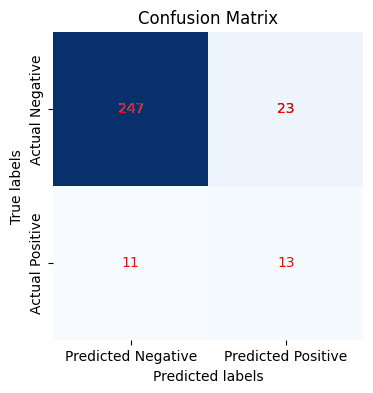

Model: Logistic Regression
Accuracy: 0.8844
Precision: 0.8691
Recall: 0.3611
F1-score: 0.8741
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       258
           1       0.54      0.36      0.43        36

    accuracy                           0.88       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.87      0.88      0.87       294

--------------------------------------------------


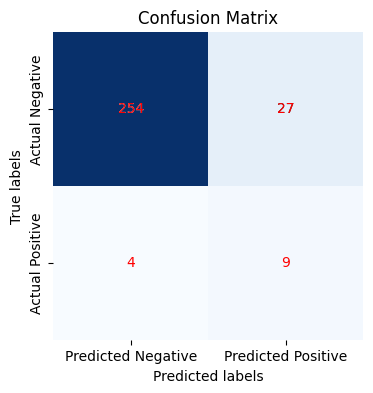

Model: XGBoost
Accuracy: 0.8946
Precision: 0.8780
Recall: 0.2500
F1-score: 0.8721
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       258
           1       0.69      0.25      0.37        36

    accuracy                           0.89       294
   macro avg       0.80      0.62      0.65       294
weighted avg       0.88      0.89      0.87       294

--------------------------------------------------


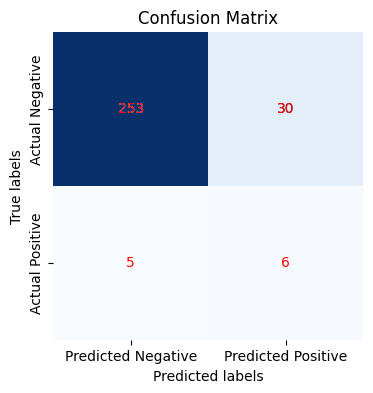

Model: AdaBoost
Accuracy: 0.8810
Precision: 0.8513
Recall: 0.1667
F1-score: 0.8520
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       258
           1       0.55      0.17      0.26        36

    accuracy                           0.88       294
   macro avg       0.72      0.57      0.60       294
weighted avg       0.85      0.88      0.85       294

--------------------------------------------------


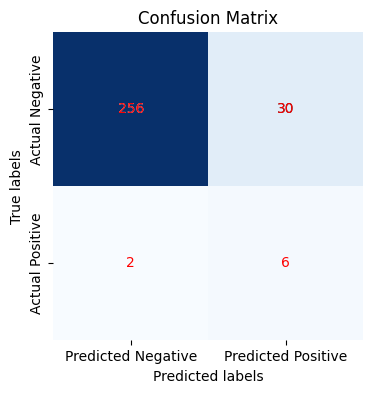

Model: Support Vector Machine
Accuracy: 0.8912
Precision: 0.8773
Recall: 0.1667
F1-score: 0.8593
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       258
           1       0.75      0.17      0.27        36

    accuracy                           0.89       294
   macro avg       0.82      0.58      0.61       294
weighted avg       0.88      0.89      0.86       294

--------------------------------------------------


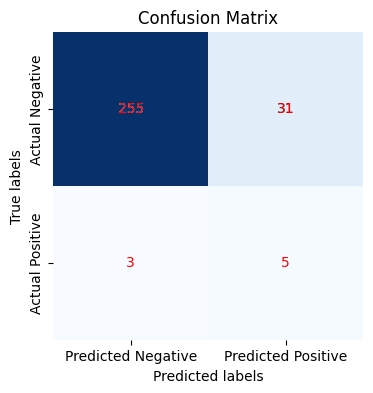

Model: Random Forest
Accuracy: 0.8844
Precision: 0.8590
Recall: 0.1389
F1-score: 0.8505
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       258
           1       0.62      0.14      0.23        36

    accuracy                           0.88       294
   macro avg       0.76      0.56      0.58       294
weighted avg       0.86      0.88      0.85       294

--------------------------------------------------


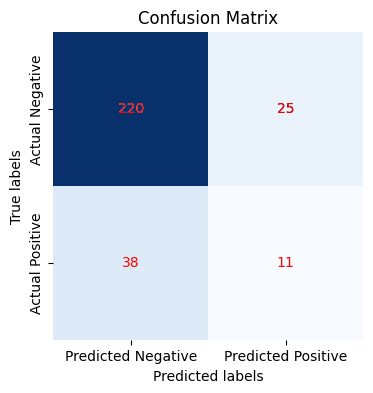

Model: Decision Tree
Accuracy: 0.7857
Precision: 0.8155
Recall: 0.3056
F1-score: 0.7993
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       258
           1       0.22      0.31      0.26        36

    accuracy                           0.79       294
   macro avg       0.56      0.58      0.57       294
weighted avg       0.82      0.79      0.80       294

--------------------------------------------------


In [42]:
evaluate_models(X_train_scaled , y_train , X_test_scaled , y_test)

## HYPERPARAMETER TUNING 

Here we are choosing recall as scoring metrics 

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

def tune_models(X_train, y_train):
    # Define the models and their respective hyperparameter grids
    models = {
        'SVM': {
            'model': SVC(),
            'param_grid': {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf', 'poly'],
                'gamma': ['scale', 'auto', 0.1, 1]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'param_grid': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]
            }
        },
        'Logistic Regression': {
            'model': LogisticRegression(),
            'param_grid': {
                'C': [0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'saga']
            }
        }
    }

    # Dictionary to hold the best models and their performance
    best_models = {}

    # Iterate through each model in the dictionary
    for model_name, model_info in models.items():
        # Define the model and parameter grid
        model = model_info['model']
        param_grid = model_info['param_grid']

        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
        grid_search.fit(X_train, y_train)

        # Get the best model and performance
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        # Save the best model information
        best_models[model_name] = {
            'best_model': best_model,
            'best_score': best_score,
            'best_params': best_params
        }

    # Return the dictionary of best models and their performance
    return best_models



In [22]:
tune_models(X_train_scaled , y_train)

{'SVM': {'best_model': SVC(C=10, kernel='linear'),
  'best_score': 0.46280487804878045,
  'best_params': {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}},
 'XGBoost': {'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'best_score': 0.35341463414634144,
  'best

# Choosing SVM

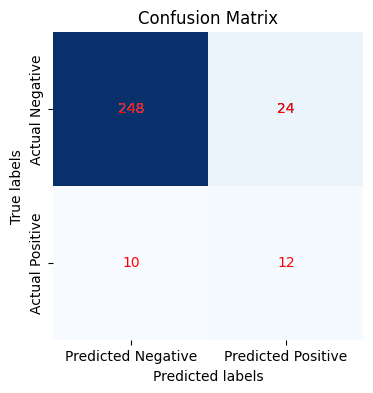

accuracy : 0.8844
recall : 0.3333
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       258
           1       0.55      0.33      0.41        36

    accuracy                           0.88       294
   macro avg       0.73      0.65      0.67       294
weighted avg       0.87      0.88      0.87       294



In [35]:
#without assigning class weights
model = SVC(kernel='linear', C=10, gamma='scale')
model.fit(X_train_scaled, y_train)

# Evaluate the new model
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_pred , y_test)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Loop through all cells and annotate them
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='red')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print(f"accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred,average='binary'):.4f}")
print(classification_report(y_test, y_pred))


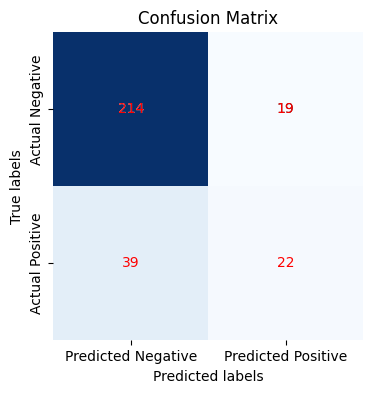

accuracy : 0.8027
recall : 0.5366
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       253
           1       0.36      0.54      0.43        41

    accuracy                           0.80       294
   macro avg       0.64      0.69      0.66       294
weighted avg       0.84      0.80      0.82       294



In [65]:
# Set class weights (increase weight for class 1)
model = SVC(kernel='linear', C=10, gamma='scale', class_weight={0: 1, 1: 3})
model.fit(X_train_scaled, y_train)

# Evaluate the new model
y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_pred , y_test)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Loop through all cells and annotate them
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='red')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print(f"accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred,average='binary'):.4f}")
print(classification_report(y_test, y_pred))

In [66]:
joblib.dump(model, 'svm_model.pkl')

['svm_model.pkl']